<a href="https://colab.research.google.com/github/PriyanshuR23/Industrial_IOT_Predictive_Maintenance/blob/main/Industrial_Pump_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Datasets/sensor.csv')
print(df.head())

Mounted at /content/drive
   ID  sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  sensor_05  \
0   1   2.465394   47.09201    53.2118  46.310760   634.3750   76.45975   
1   2   2.465394   47.09201    53.2118  46.310760   634.3750   76.45975   
2   3   2.444734   47.35243    53.2118  46.397570   638.8889   73.54598   
3   4   2.460474   47.09201    53.1684  46.397568   628.1250   76.98898   
4   5   2.445718   47.13541    53.2118  46.397568   636.4583   76.58897   

   sensor_06  sensor_07  sensor_08  ...  sensor_43  sensor_44  sensor_45  \
0   13.41146   16.13136   15.56713  ...  39.641200   65.68287   50.92593   
1   13.41146   16.13136   15.56713  ...  39.641200   65.68287   50.92593   
2   13.32465   16.03733   15.61777  ...  39.351852   65.39352   51.21528   
3   13.31742   16.24711   15.69734  ...  39.062500   64.81481   51.21528   
4   13.35359   16.21094   15.69734  ...  38.773150   65.10416   51.79398   

   sensor_46  sensor_47  sensor_48  sensor_49  sensor_50  machine_

In [3]:
# Convert Timestamp Column
df['timestamp'] = pd.to_datetime(df.iloc[:, 53], format='%d-%m-%y %H:%M')

In [4]:
# Data Overview
print("Dataset Summary:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220313 entries, 0 to 220312
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID              220313 non-null  int64         
 1   sensor_00       210105 non-null  float64       
 2   sensor_01       219944 non-null  float64       
 3   sensor_02       220294 non-null  float64       
 4   sensor_03       220294 non-null  float64       
 5   sensor_04       220294 non-null  float64       
 6   sensor_05       220294 non-null  float64       
 7   sensor_06       215515 non-null  float64       
 8   sensor_07       214862 non-null  float64       
 9   sensor_08       215206 non-null  float64       
 10  sensor_09       215718 non-null  float64       
 11  sensor_10       220294 non-null  float64       
 12  sensor_11       220294 non-null  float64       
 13  sensor_12       220294 non-null  float64       
 14  sensor_13       220

In [5]:
# Handling Missing Values
df.iloc[:, 1:52] = df.iloc[:, 1:52].fillna(df.iloc[:, 1:52].median())
df = df.dropna(subset=['machine_status'])

In [6]:
print(df.isnull().sum())

ID                0
sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_15         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0


In [7]:
# Variance Analysis for Feature Selection
variances = df.iloc[:, 1:52].var().sort_values(ascending=False)
selected_sensors = variances[variances > 0.01].index.tolist()
selected_sensors.append('machine_status')

Variance measures spread of data points: **σ² = Σ(xᵢ - μ)²/N**
Because High variance = More information content

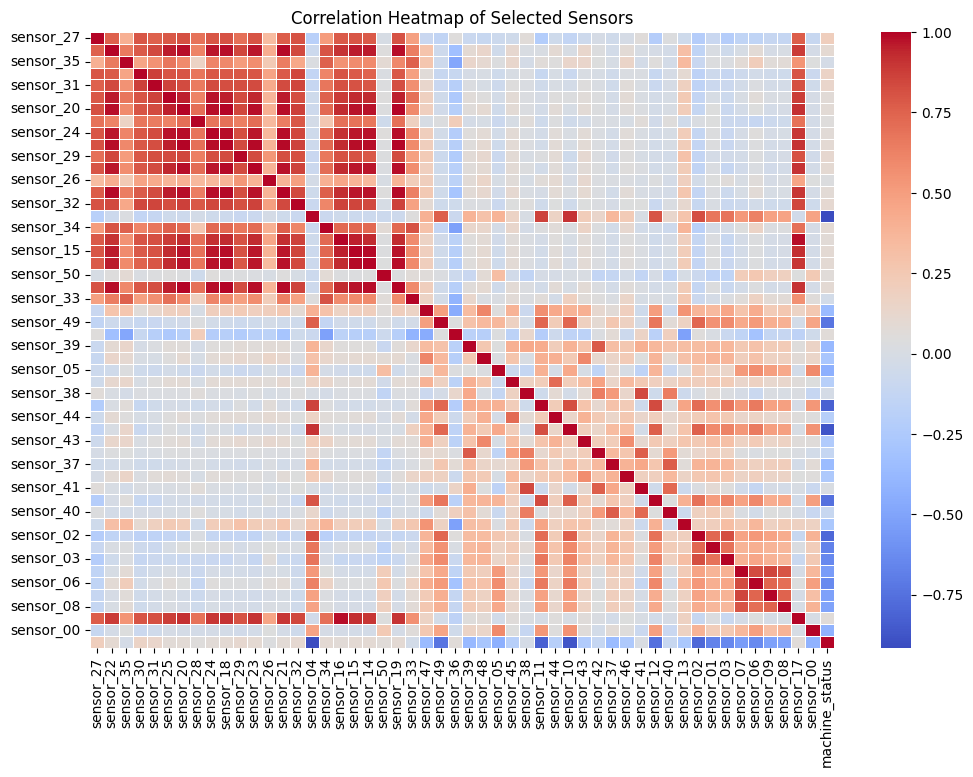

In [8]:
# Correlation Analysis
# Include all relevant columns for correlation analysis
correlation_matrix = df[selected_sensors].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Sensors')
plt.show()

In [9]:
# Find absolute correlations with target variable
target = 'machine_status'  # Update based on actual failure column
correlations = correlation_matrix[target].abs().sort_values(ascending=False)
# print(correlations)

# Select top features (excluding the target itself)
important_features = correlations[correlations >= 0.5].index.tolist()
print("Selected Features:", important_features)

Selected Features: ['machine_status', 'sensor_04', 'sensor_10', 'sensor_11', 'sensor_02', 'sensor_12', 'sensor_49', 'sensor_01', 'sensor_03', 'sensor_06', 'sensor_07', 'sensor_09', 'sensor_08']


In [10]:
important_features.remove('machine_status')
print("Selected Features:", important_features)
len(important_features)

Selected Features: ['sensor_04', 'sensor_10', 'sensor_11', 'sensor_02', 'sensor_12', 'sensor_49', 'sensor_01', 'sensor_03', 'sensor_06', 'sensor_07', 'sensor_09', 'sensor_08']


12

Using Variance + Correlation approach to reduce the sensors since it preserves the **original sensor** identities while removing redundancy.


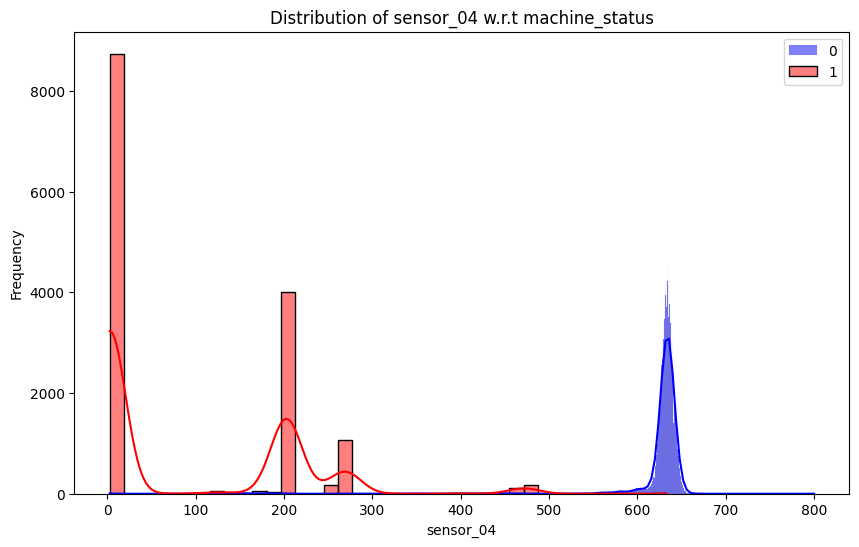

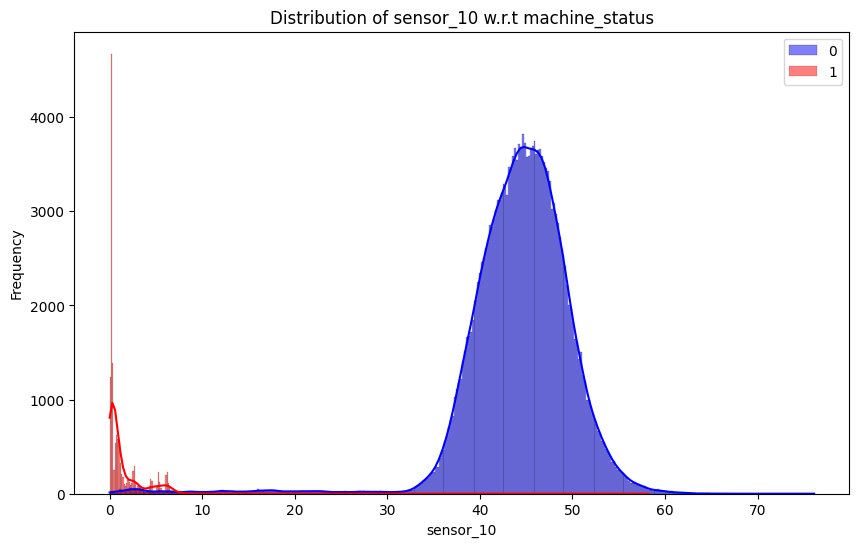

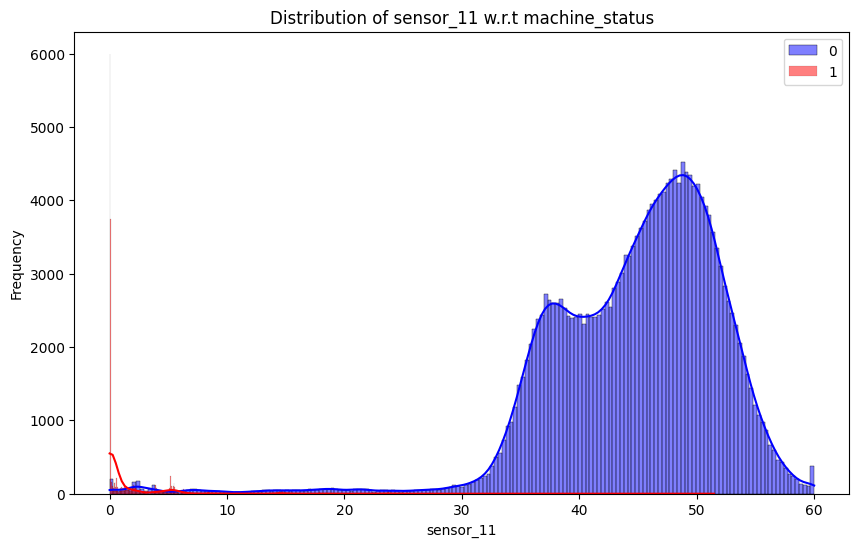

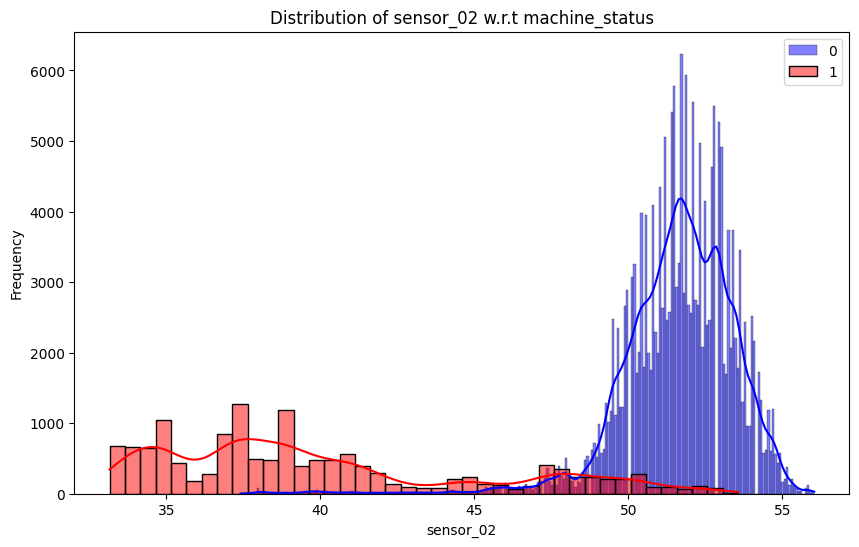

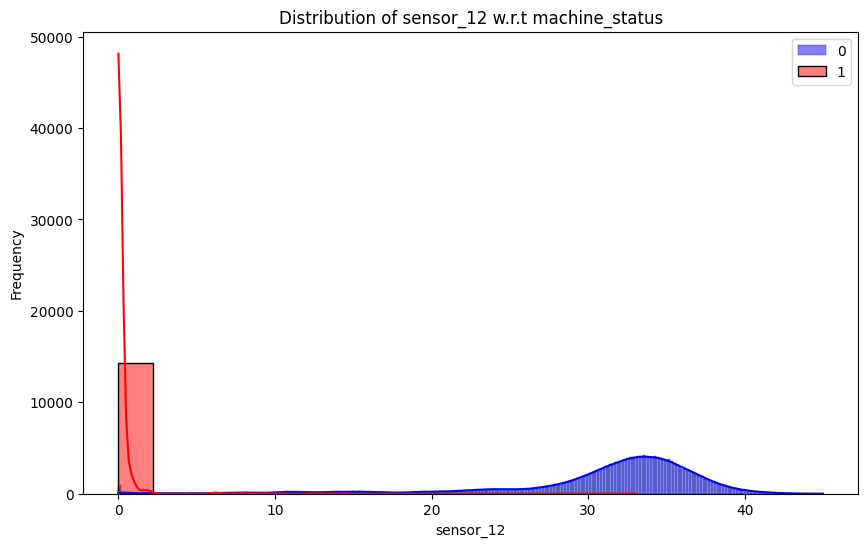

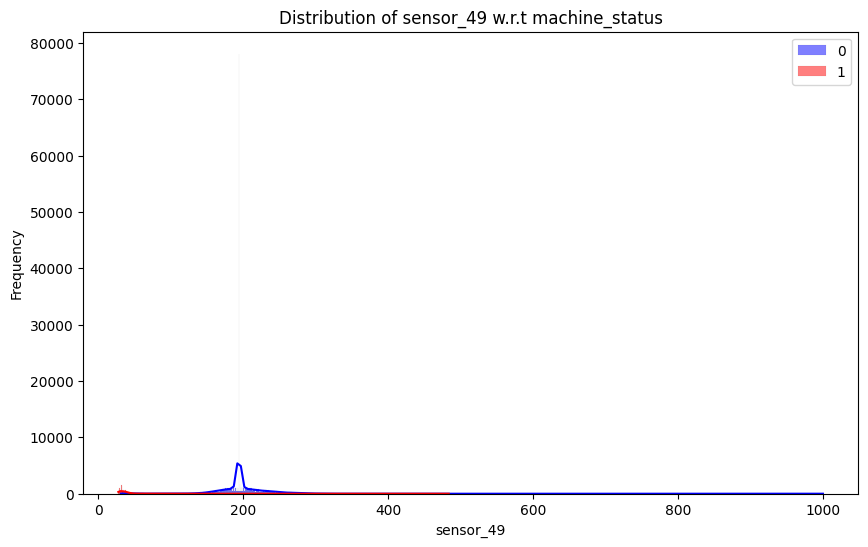

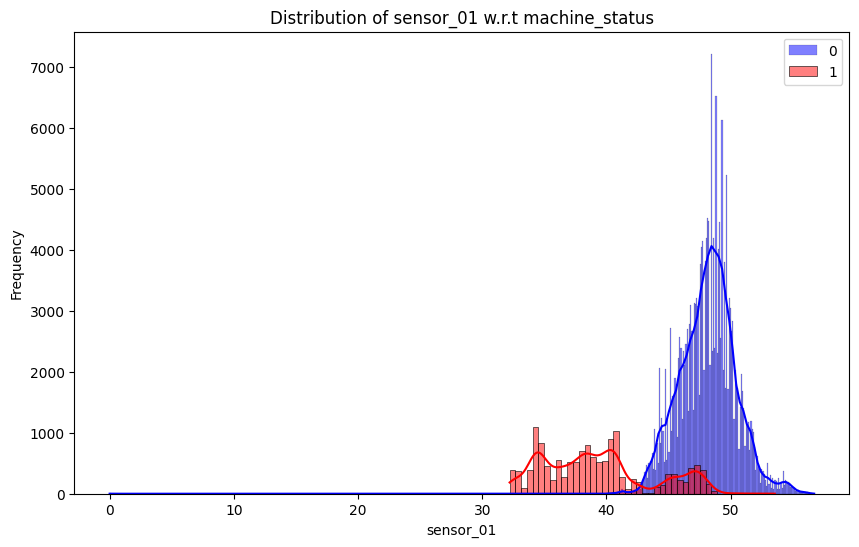

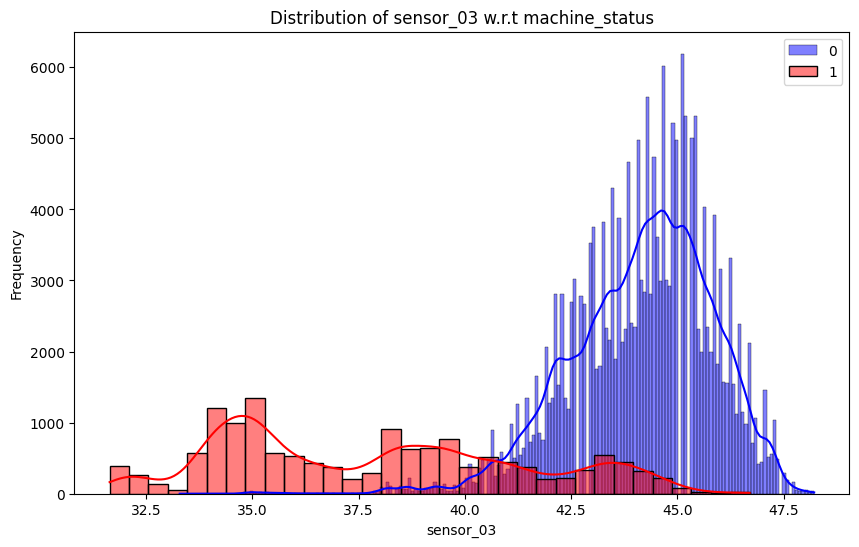

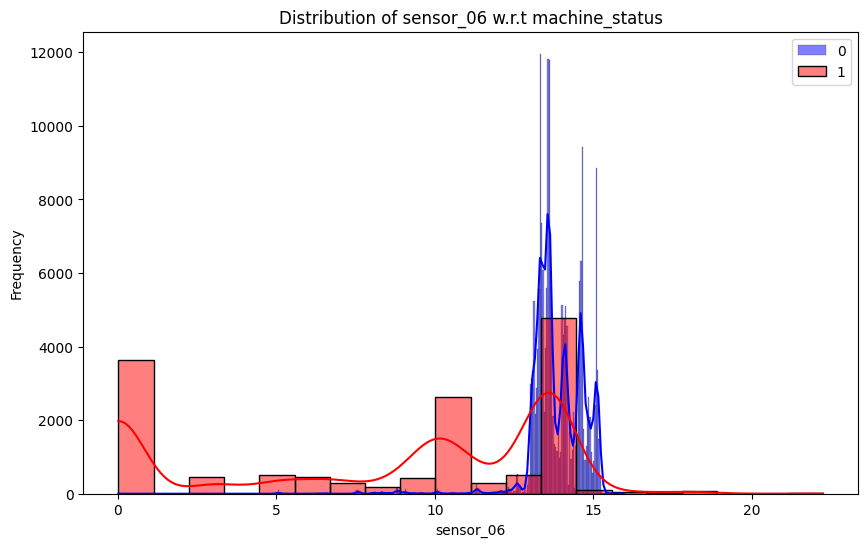

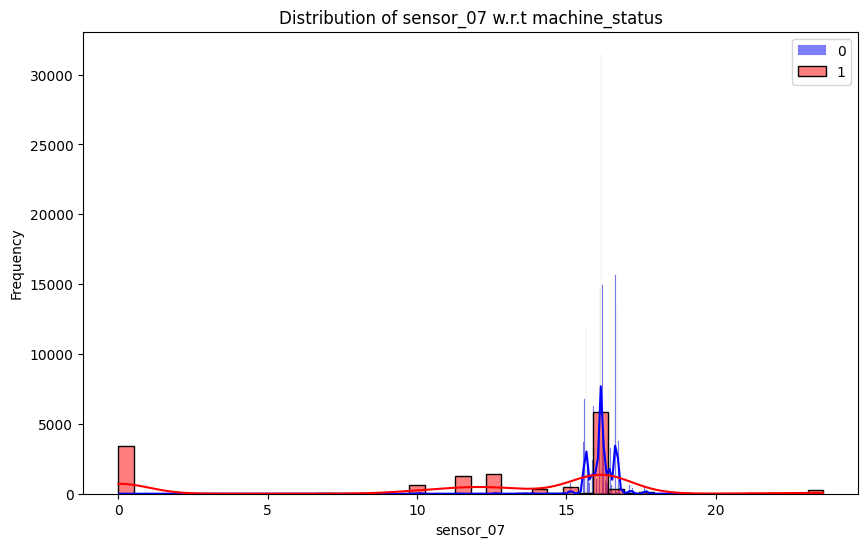

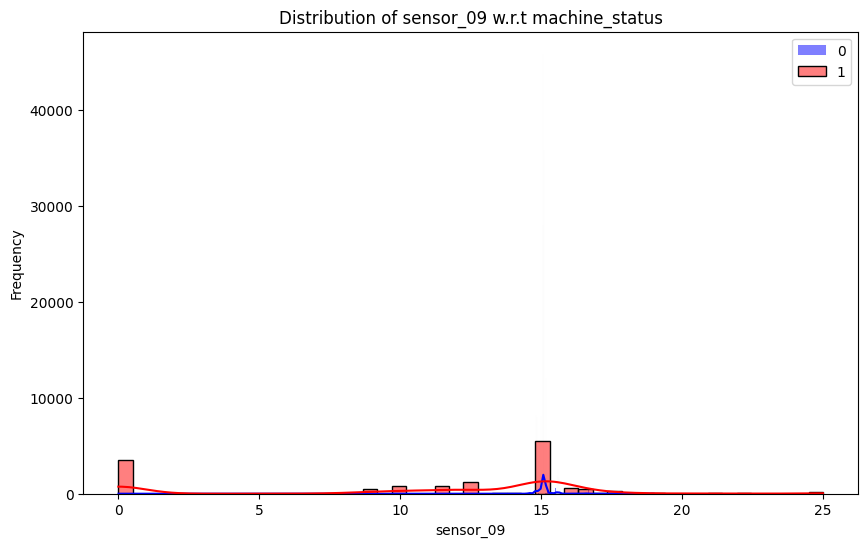

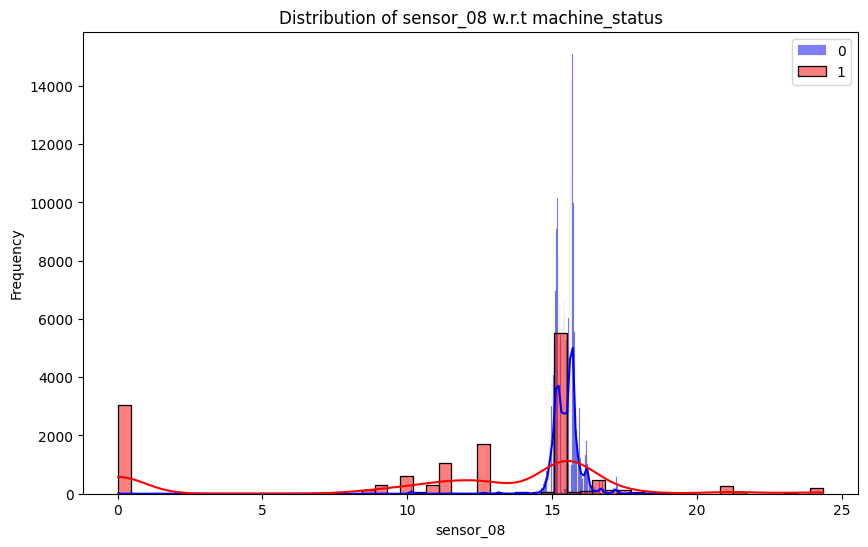

In [24]:

import matplotlib.pyplot as plt
for feature in important_features:
  plt.figure(figsize=(10, 6))
  sns.histplot(df[df['machine_status'] == 0][feature], color='blue', label='0', kde=True)
  sns.histplot(df[df['machine_status'] == 1][feature], color='red', label='1', kde=True)
  plt.title(f'Distribution of {feature} w.r.t machine_status')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.legend()
  plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


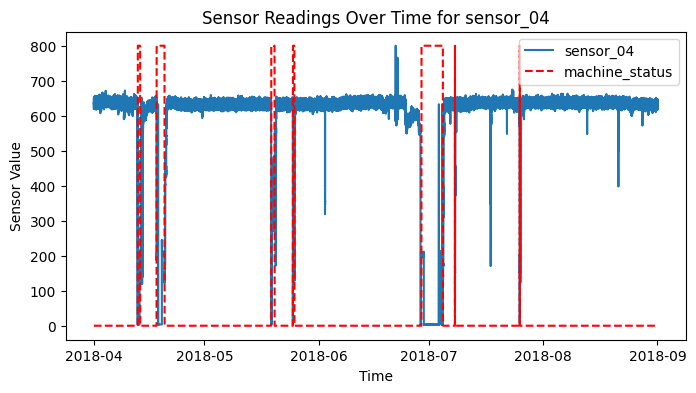

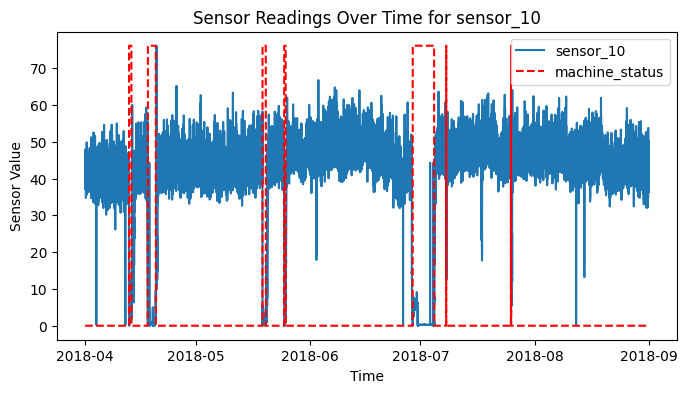

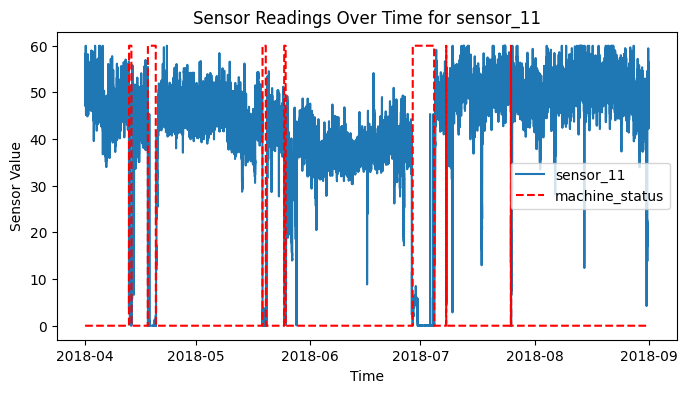

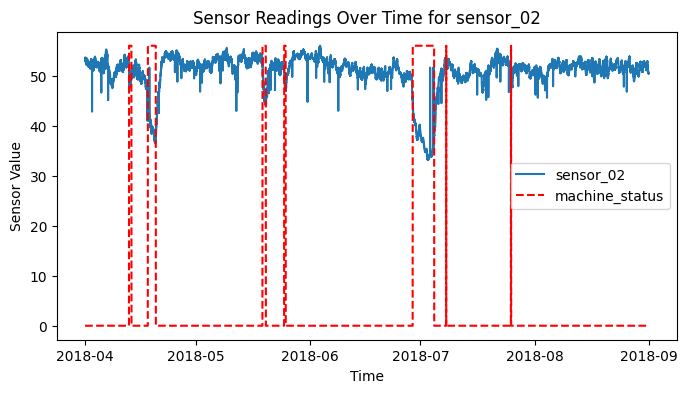

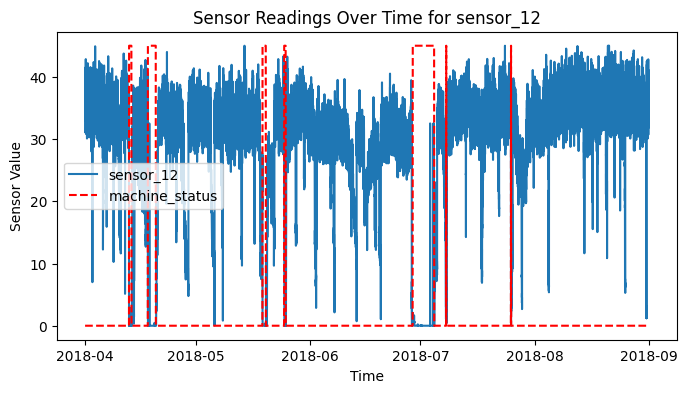

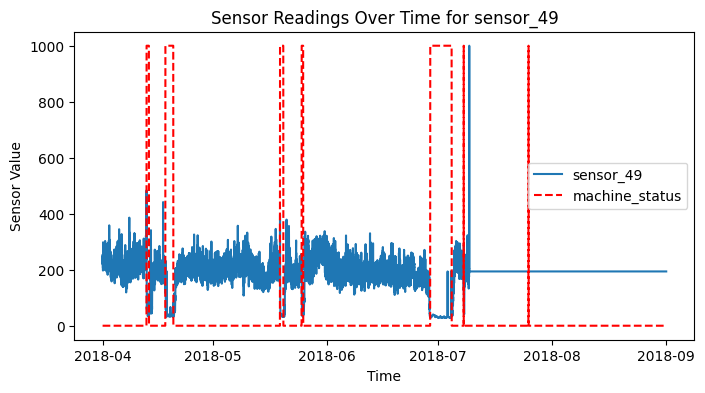

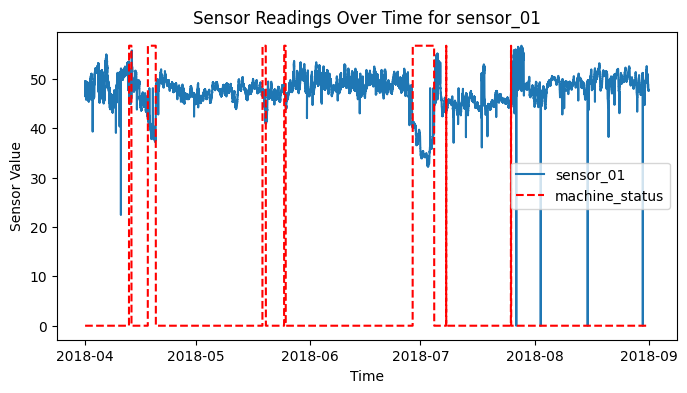

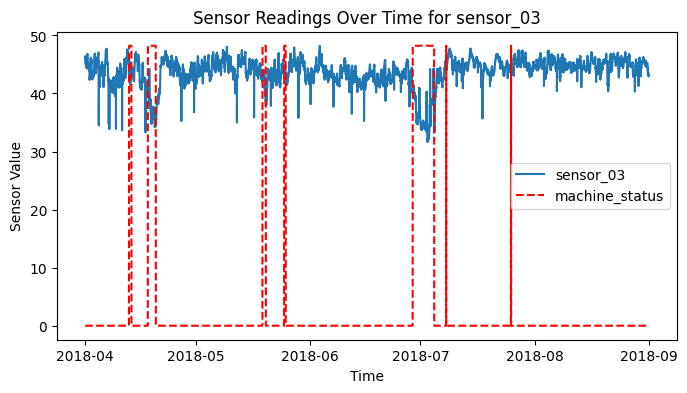

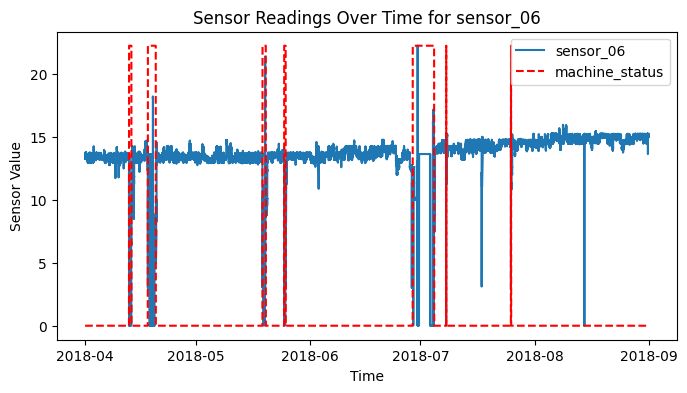

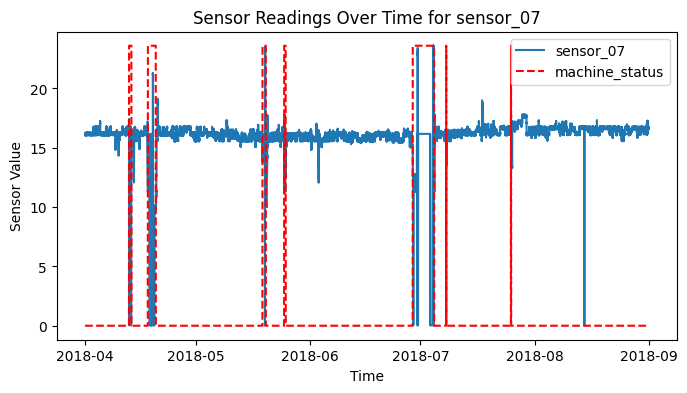

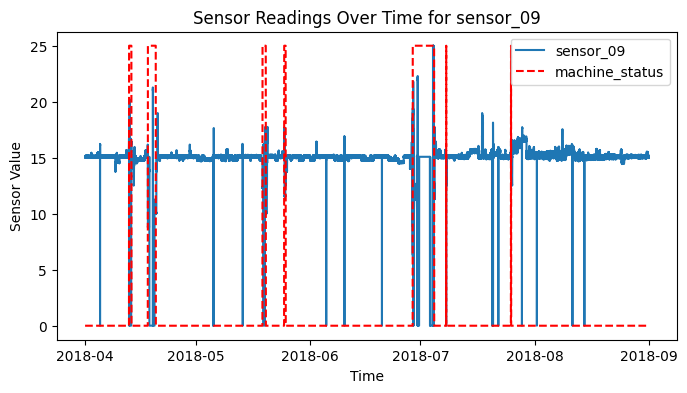

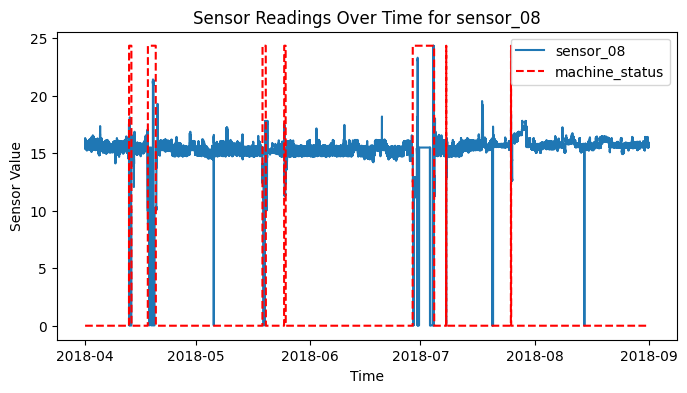

In [25]:
# Time-Series Plots for Individual Sensors with Target Variable
for sensor in important_features:
    plt.figure(figsize=(8, 4))  # Create a new figure for each sensor
    plt.plot(df['timestamp'], df[sensor], label=sensor)

    # Overlay target variable as a separate line
    plt.plot(df['timestamp'], df['machine_status'] * df[sensor].max(),
             label='machine_status', linestyle='--', color='red')
    # Scaling for visibility

    plt.title(f'Sensor Readings Over Time for {sensor}')
    plt.xlabel('Time')
    plt.ylabel('Sensor Value')
    plt.legend()
    plt.show()


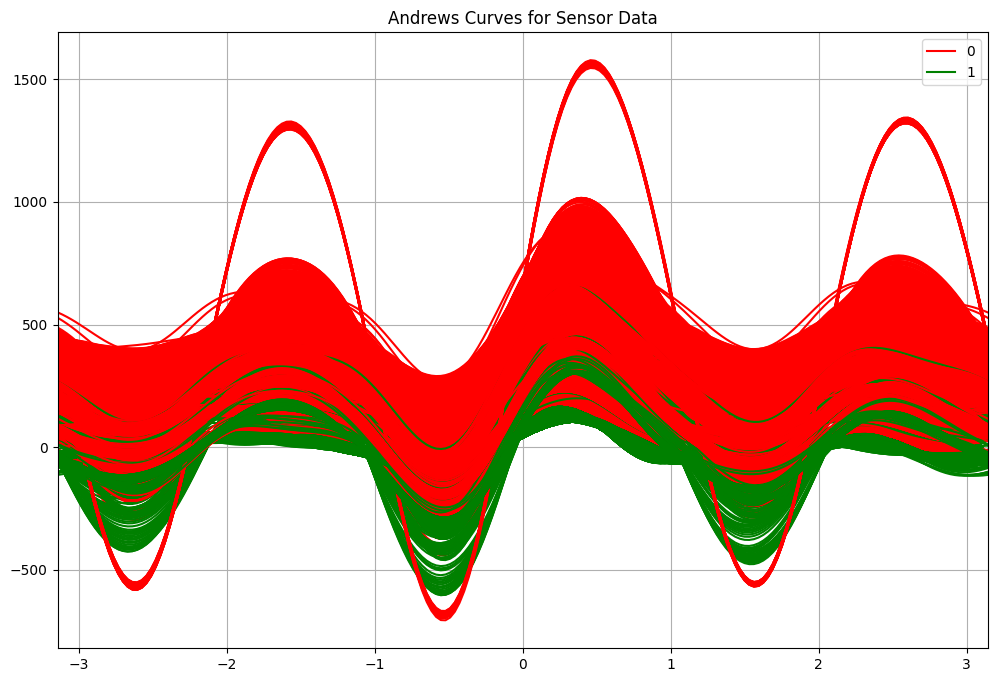

In [28]:
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves

# Assuming 'machine_status' is your target variable
# and 'important_features' contains the sensor columns you want to plot

# Create a new DataFrame with only the selected features and the target
df_plot = df[important_features + ['machine_status']]

# Plot Andrews curves
plt.figure(figsize=(12, 8))
andrews_curves(df_plot, 'machine_status',color=['red', 'green'])
plt.title('Andrews Curves for Sensor Data')
plt.show()


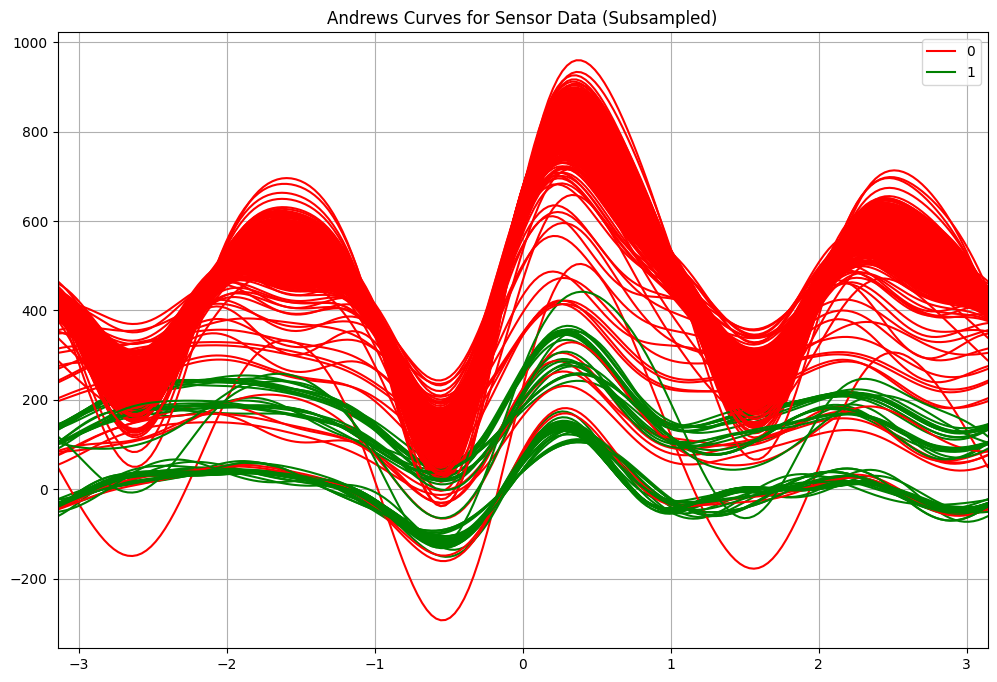

In [31]:
import random
   # Selecting a random sample of 1000 data points
sample_size = 1000
df_sample = df_plot.sample(n=sample_size, random_state=42)  # Set a random_state for reproducibility
   # Now, plot Andrews curves using df_sample
plt.figure(figsize=(12, 8))
andrews_curves(df_sample, 'machine_status', color=['red', 'green'])
plt.title('Andrews Curves for Sensor Data (Subsampled)')
plt.show()

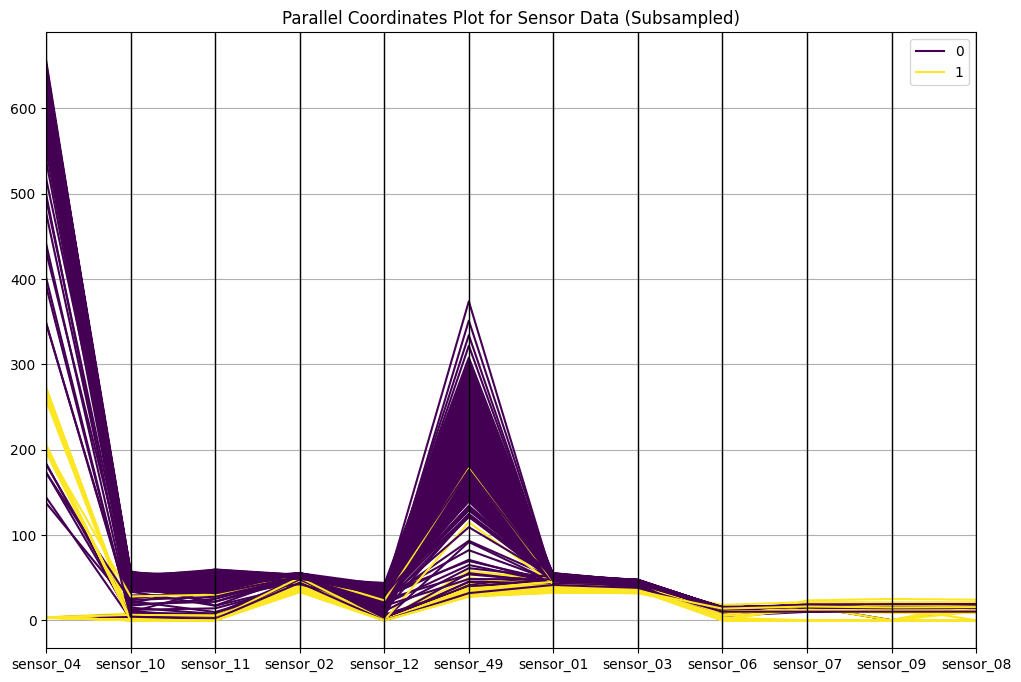

In [36]:
from pandas.plotting import parallel_coordinates

# Plot parallel coordinates
# plt.figure(figsize=(12, 8))
# parallel_coordinates(df_plot, 'machine_status', color=['red', 'green'])
# plt.title('Parallel Coordinates Plot for Sensor Data')
# plt.show()


sample_size = 1000
df_sample = df_plot.sample(n=sample_size, random_state=42)
plt.figure(figsize=(12, 8))
parallel_coordinates(df_sample, 'machine_status', colormap ='viridis')
plt.title('Parallel Coordinates Plot for Sensor Data (Subsampled)')
plt.show()


machine_status
0    205836
1     14477
Name: count, dtype: int64


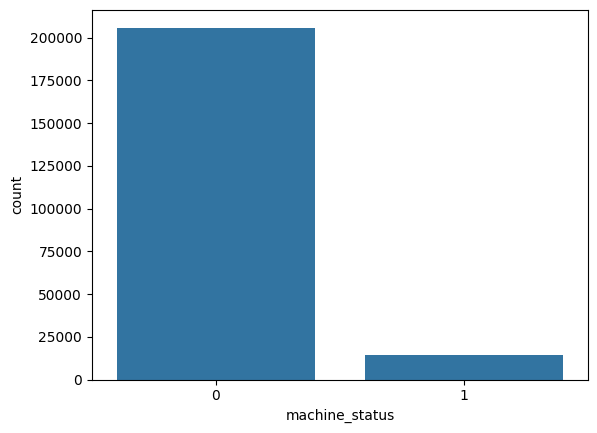

Probability of Failure True: 0.06571105654228303
Probability of Failure False: 0.934288943457717


In [38]:

print(df['machine_status'].value_counts())
sns.countplot(x=df['machine_status'])
plt.show()

work = df[df['machine_status']==0]
fail = df[df['machine_status']==1]

num_work=work['machine_status'].shape[0]
num_fail=fail['machine_status'].shape[0]

print(f"Probability of Failure True: {num_fail/(num_work+num_fail)}")
print(f"Probability of Failure False: {num_work/(num_work+num_fail)}")

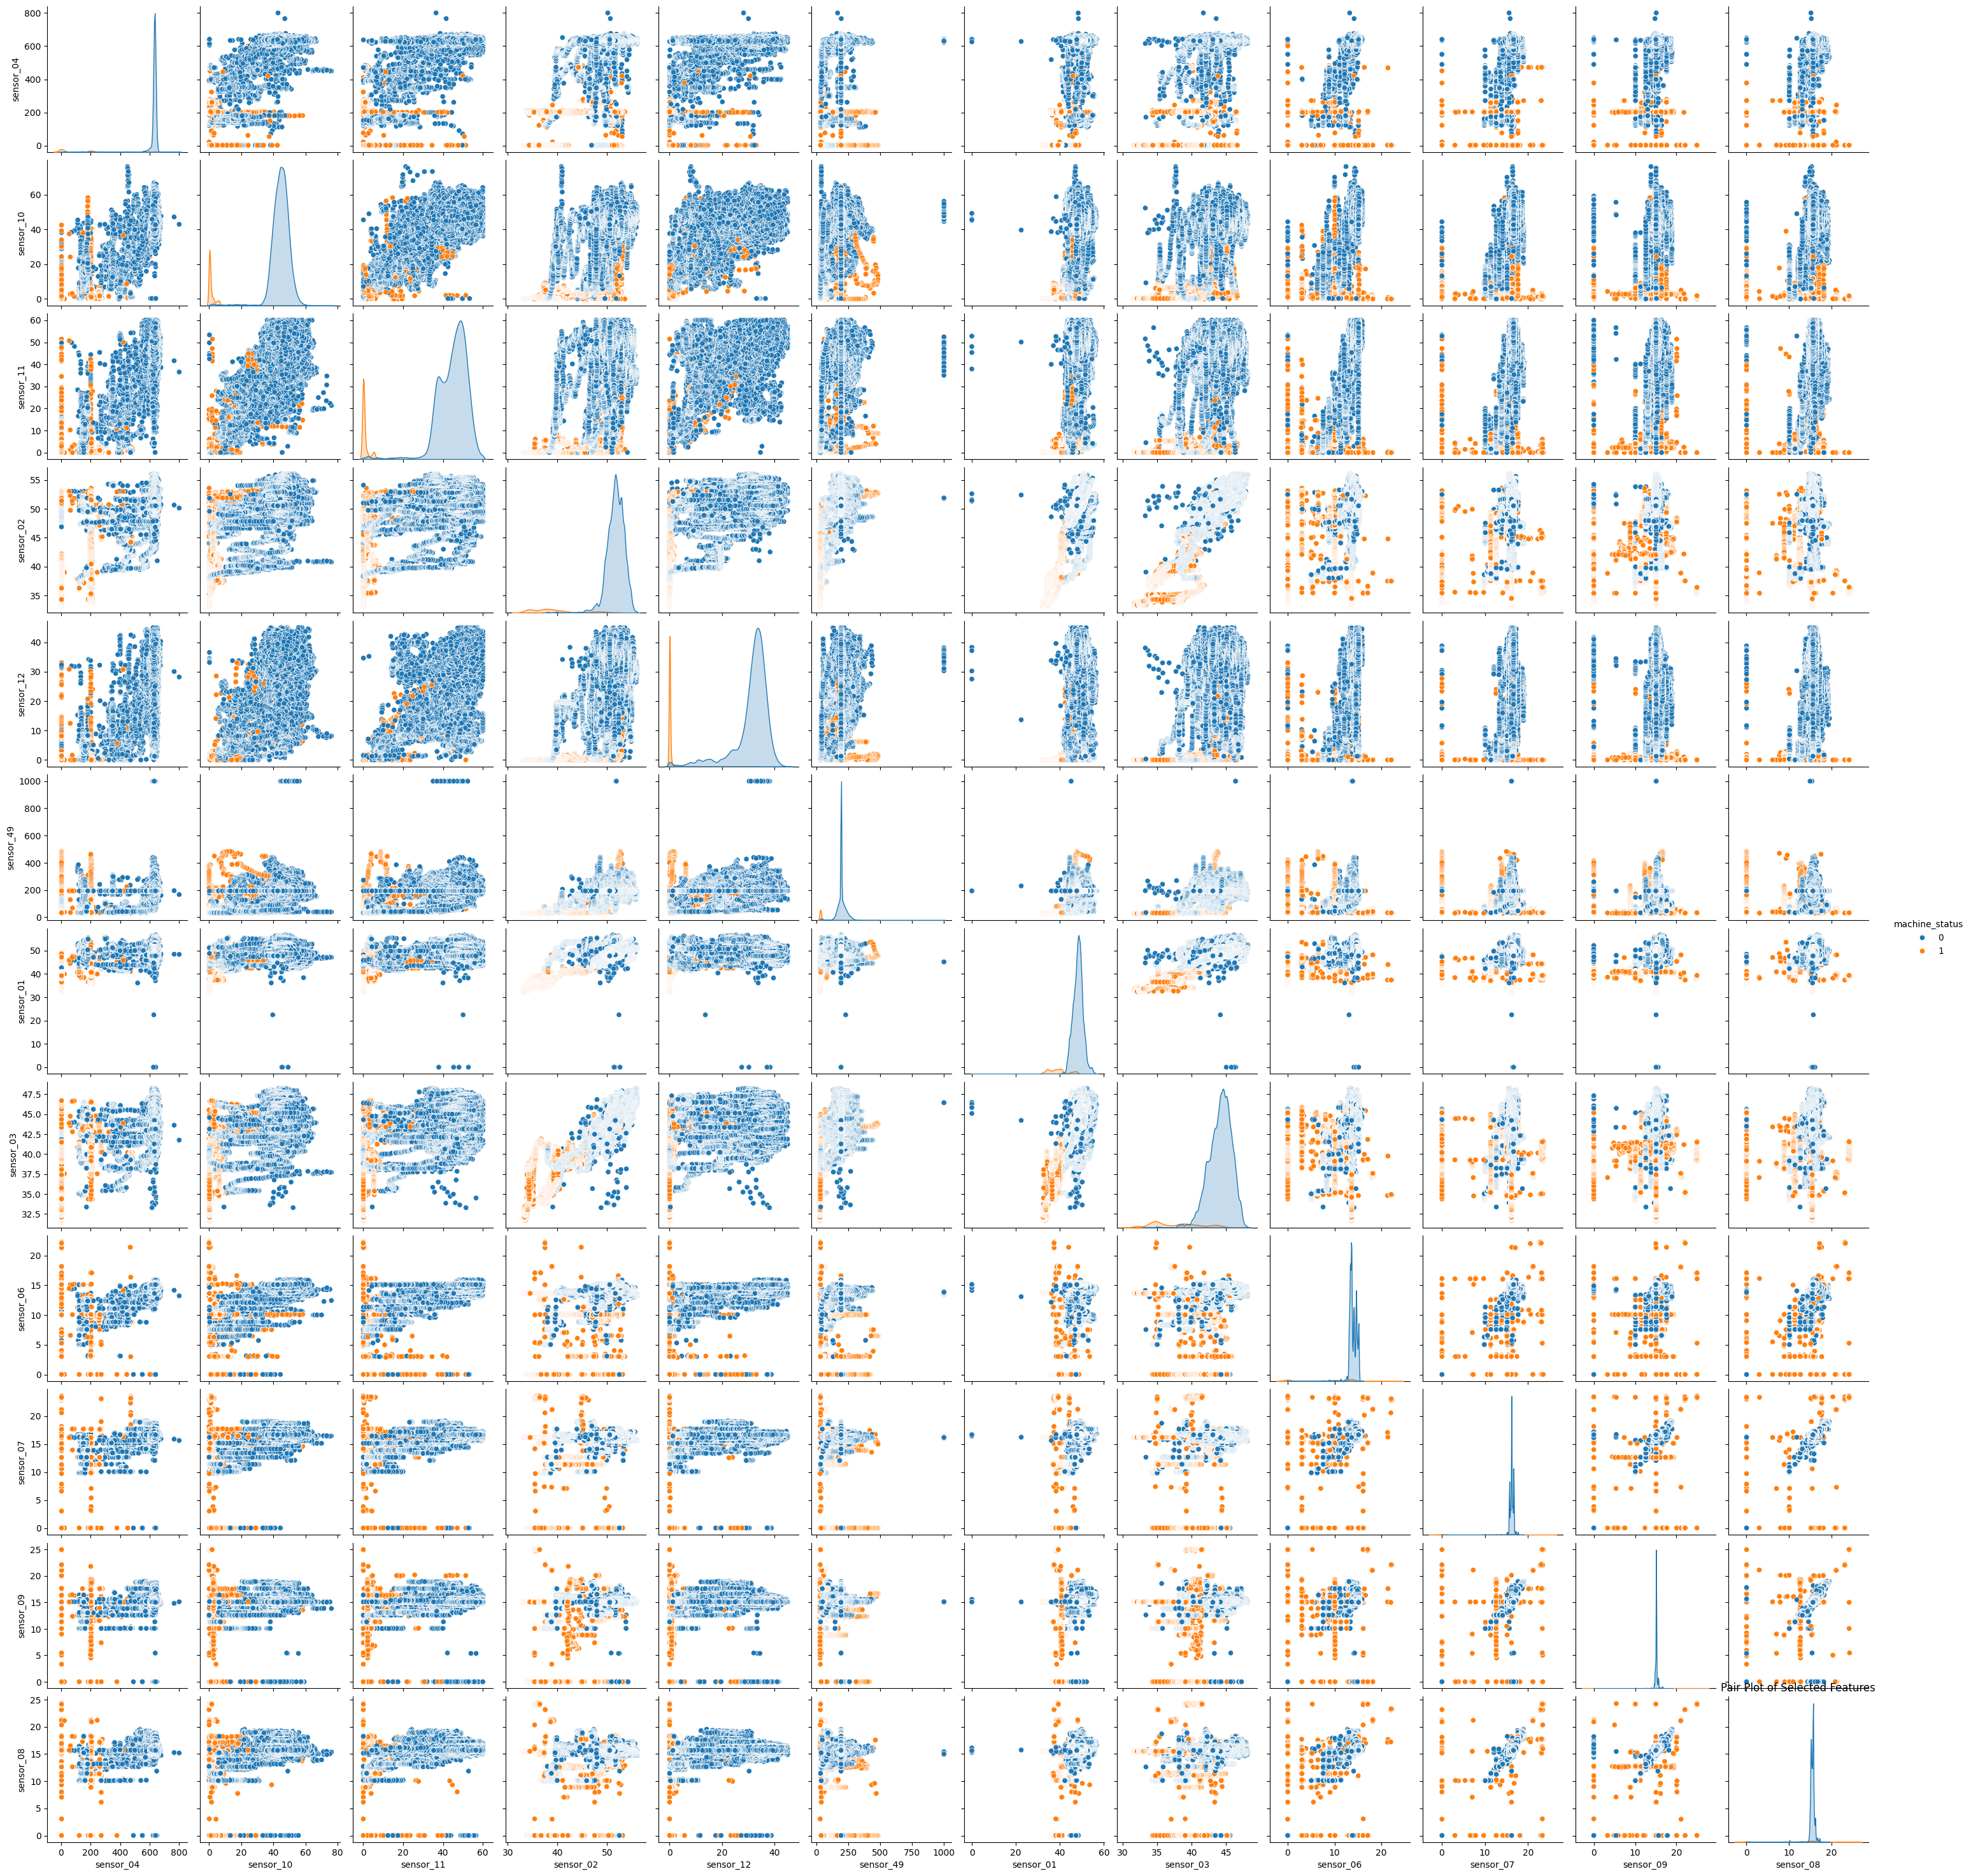

In [14]:
# prompt: Plot a pair plot graph for df_plot = df[important_features + ['machine_status']]

import matplotlib.pyplot as plt
# Assuming df_plot is defined as in your code

# Plot a pair plot
sns.pairplot(df_plot, hue='machine_status', diag_kind='kde')
plt.title('Pair Plot of Selected Features')
plt.show()


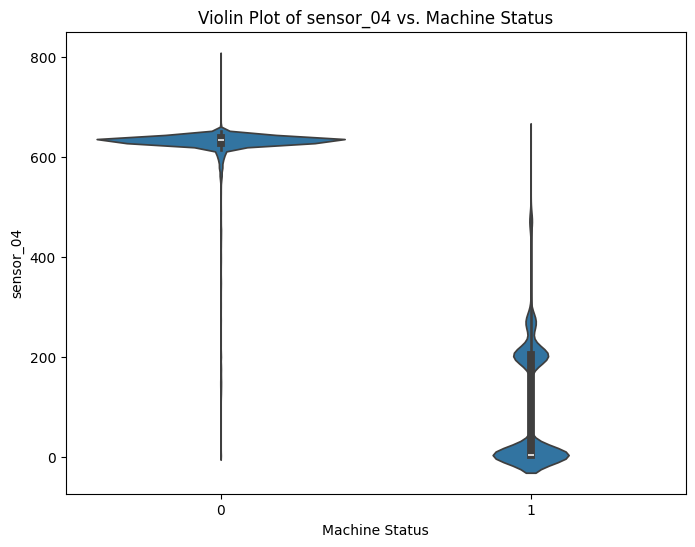

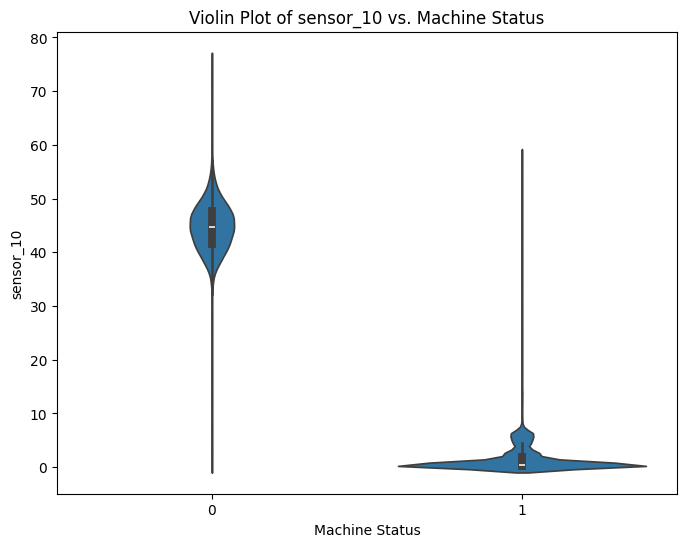

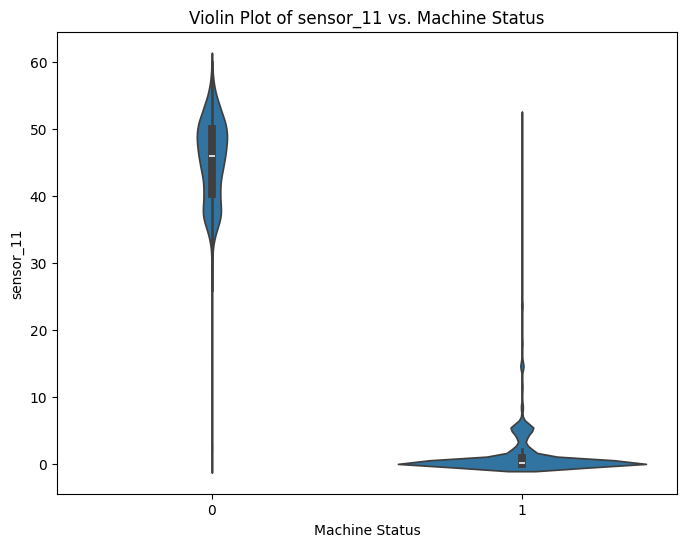

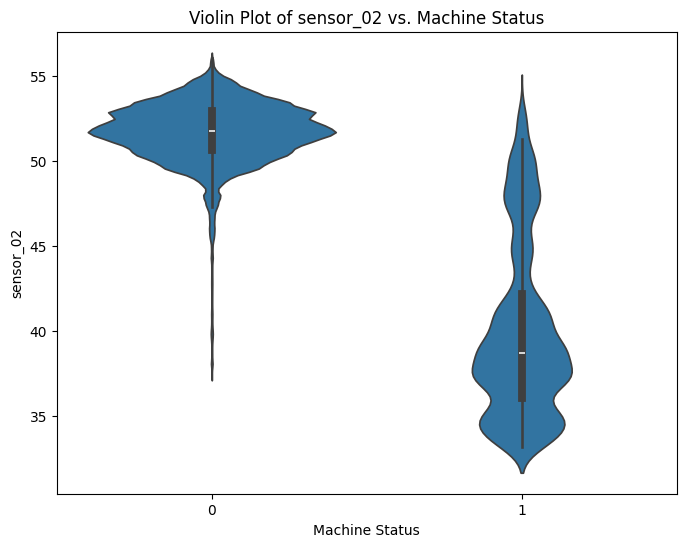

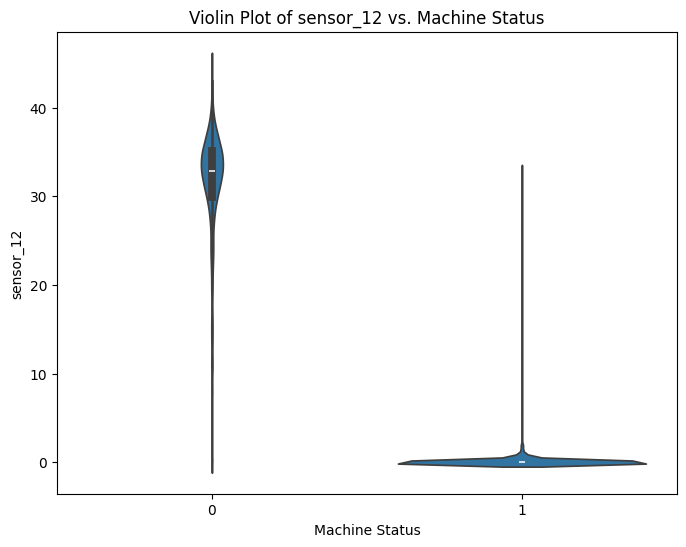

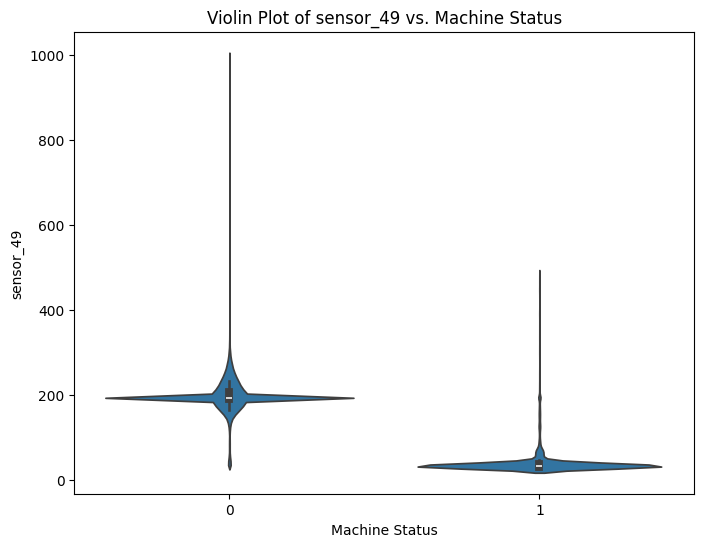

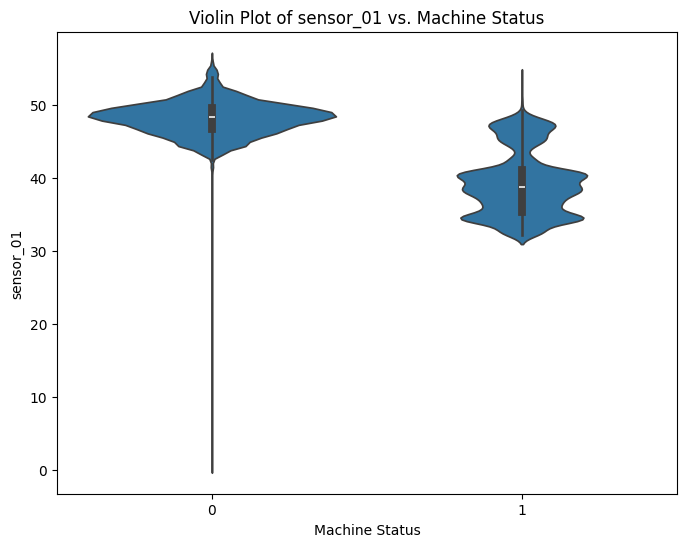

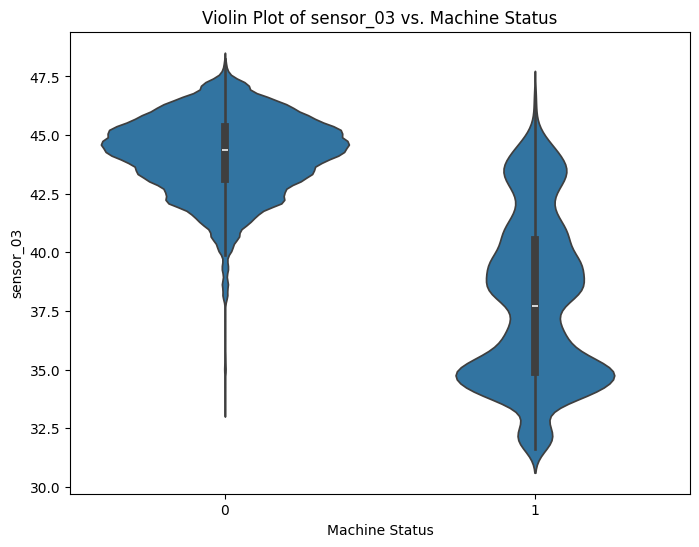

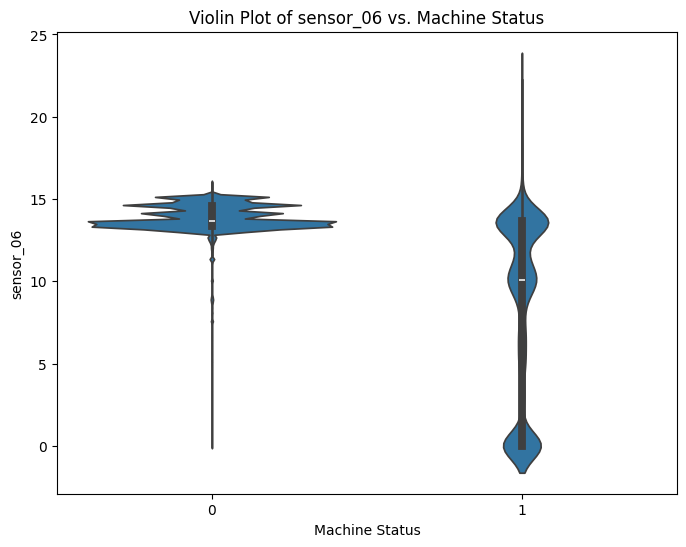

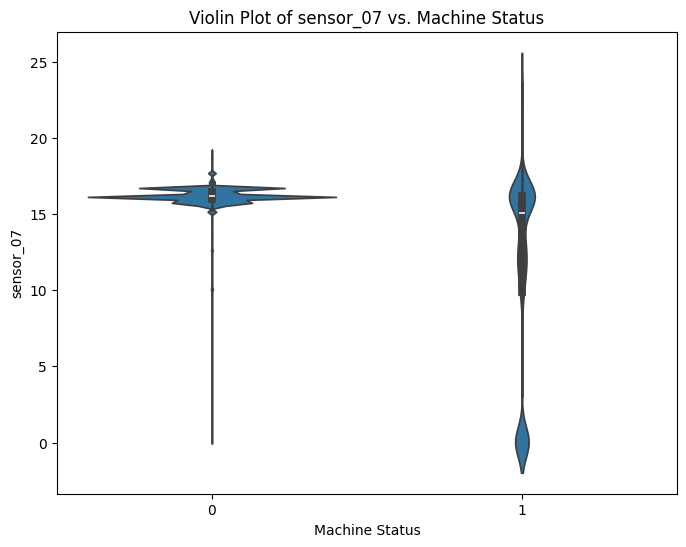

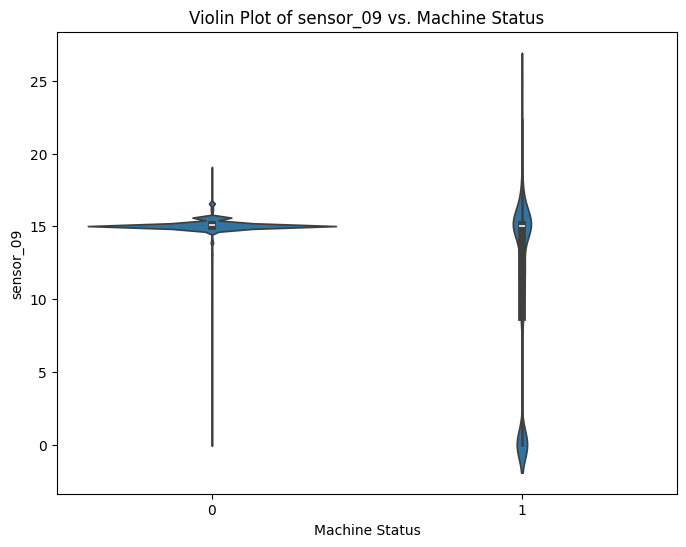

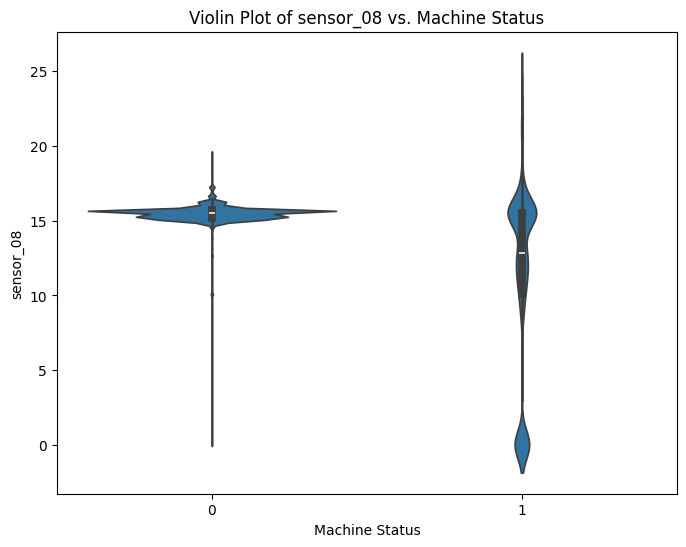

In [21]:
# Create violin plots for each feature, grouped by machine_status
for feature in important_features:
  plt.figure(figsize=(8, 6))
  sns.violinplot(x='machine_status', y=feature, data=df_plot)
  plt.title(f'Violin Plot of {feature} vs. Machine Status')
  plt.xlabel('Machine Status')
  plt.ylabel(feature)
  plt.show()
